## Bias Variance Trade-off
**Bias:**

 * It is the difference between the average of all the models prediction trained on different dataset of the same distribution and the ground truth.

 * It means how well the model learned the data.
 
 * Lower bias value means, model learned the data very well. On the other hand, higher bias value means:
     * Underfitted model
     * Overly-simplified model
     * Model gives high error on both train & test data.
     
**Variance:**

  * It means the variability between the predictions of the model trained on different datasets from same distribution.
  
  * It means how well the model is generalized. That is, how well the model can predict unseen (or real-world) data.
  
  * Lower variance value means, model is well generalized. On the other hand, higher variance value means:
      * Overfitted model
      * Overly-complex model
      * Model gives high error on test data but works well on train data.
      
      


In most of the cases, there is an inverse relation between bias and variance. That is, the lower is bias, higher could be variance.

So, there is a trade-off between bias and variance. Such that neither of them are lower nor higher but no some sweet spot.

If that sweet spot (or balanced point) is achieved then, the model is generalized and could give good results on both training ans unseen (test) data.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [613]:
def generate_data(n_samples = 1000, dim = 1, noise = 0.2, shift_range = [-1, 1], f = 1):
    
    # creating a distribution
    x_range = [-1, 1]
    dff = x_range[1] - x_range[0]
    
    x = np.arange(x_range[0], x_range[1], dff/n_samples).reshape(-1, 1)
    y = np.sin(f*np.pi*x + np.random.uniform(shift_range[0], shift_range[1]))
    y += np.random.normal(loc = 0.0, scale = noise, size = (x.shape))
    return x, y

(1000, 1) (1000, 1)


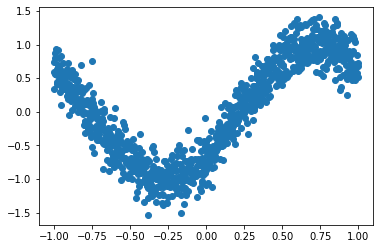

In [640]:
xy = generate_data(1000)
print(xy[0].shape, xy[1].shape)

plt.scatter(xy[0], xy[1])
plt.show()

In [616]:
n_degree = 10 #10
n_data = 100 #20
n_samples = 1000
dim = 1 #5
noise = 1 #0.2
shift_range = [-1, 1]
f = 1

xTest, yTest = generate_data(n_samples = 1000, dim = dim, noise = 0.1, shift_range = [-0.1, 0.1], f = f)

predictions = {}
for deg in range(n_degree):
    predictions[deg] = []
    for d in range(n_data):
        x, y = generate_data(n_samples, dim, noise, shift_range = shift_range, f = f)
        
        poly = PolynomialFeatures(deg)
        poly_x = poly.fit_transform(x)
        
        lr = LinearRegression()
        lr.fit(poly_x, y)
        
        predictions[deg].append(lr.predict(poly.fit_transform(xTest)))

In [617]:
bias = []
variance = []
tot_err = []
for deg in range(n_degree):
    pred = np.squeeze(predictions[deg])
    bias.append(
        np.mean((np.mean(pred, axis = 0)[:, np.newaxis] - yTest)**2)
    ) 
    variance.append(
        np.mean((pred - np.mean(pred, axis = 0, keepdims = True))**2)
    )
    tot_err.append(bias[-1] + variance[-1])

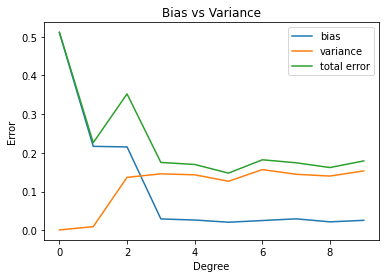

In [618]:
plt.plot(bias, label = 'bias')
plt.plot(variance, label = 'variance')
plt.plot(tot_err, label = 'total error')

plt.title('Bias vs Variance')
plt.xlabel('Degree')
plt.ylabel('Error')

plt.legend(loc = 'best')
plt.show()

In [619]:
df = pd.DataFrame({
    'degree': np.arange(n_degree),
    'bias': bias,
    'variance': variance,
    'total error': tot_err
})
df

,degree,bias,variance,total error
0,0,0.510404,0.001118,0.511522
1,1,0.216873,0.009501,0.226373
2,2,0.215413,0.136840,0.352253
3,3,0.029450,0.145870,0.175321
4,4,0.026692,0.143425,0.170116
5,5,0.020999,0.126799,0.147798
6,6,0.025320,0.156845,0.182165
7,7,0.029731,0.144736,0.174467
8,8,0.021954,0.140211,0.162164
9,9,0.025869,0.153459,0.179328


From degree 3, (after intersection between bias & variance) Bias and Variance is almost parallel (i.e; bias is not decreasing & variance is not increasing anymore)
 
So, any degree from 3 to 10 would work.
But to keep complexity lower, we could use degree 3 at least.

Thus degree of 3 could work well (i.e; with least complexity).
Other higher degree could also work good (since, bias & variance is almost parallel)

0.05127327139356098


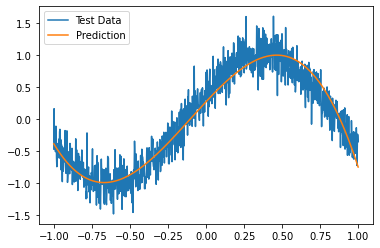

In [623]:
degree = 3

xtr, ytr = generate_data()
xts, yts = generate_data()

poly = PolynomialFeatures(3)
poly_xtr = poly.fit_transform(xtr)
poly_xts = poly.transform(xts)


lr = LinearRegression()
lr.fit(poly_xtr, ytr)

y_pred = lr.predict(poly_xts)
print(np.mean((yts - y_pred)**2))

plt.plot(xts, yts, label = 'Test Data')
plt.plot(xts, y_pred, label = 'Prediction')

plt.legend()
plt.show()

In [163]:
# x_ticks = np.arange(len(df['degree']))
# width = 0.2

# plt.figure(figsize = (20, 10))
# plt.bar(x_ticks - width, df['bias'], alpha = 0.5, width = width, label = 'bias')
# plt.bar(x_ticks, df['variance'], alpha = 0.5, width = width, label = 'variance')
# plt.bar(x_ticks + width, df['total error'], alpha = 0.5, width = width, label = 'total_error')

# plt.title('Bias vs Variance')
# plt.xlabel('Degree')
# plt.ylabel('Error')

# plt.legend()
# plt.show()

In [164]:
# plt.stairs(df['bias'], label = 'bias')
# plt.stairs(df['variance'], label = 'variance')
# plt.title('Bias vs Variance')
# plt.xlabel('Degree')
# plt.ylabel('Error')

# plt.legend()
# plt.show()